In [1]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn

You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.0.1/libexec/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.0.1/libexec/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.0.1/libexec/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.0.1/libexec/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from pylab import figure, axes, pie, title, savefig
%matplotlib inline

In [4]:
# 데이터 로드
df = pd.read_csv("/Users/hamin/bithumb_bot_data/include/2018/2018-01-btc-krw.csv")

In [5]:
# 칼럼 데이터 타입 확인
df.dtypes

timestamp     object
quantity     float64
price          int64
fee          float64
amount         int64
side           int64
dtype: object

In [6]:
# timestamp 칼럼 타입을 'object'에서 'datetime'으로 바꾸기
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S', errors='raise')
df.dtypes

timestamp    datetime64[ns]
quantity            float64
price                 int64
fee                 float64
amount                int64
side                  int64
dtype: object

In [7]:
## converting timestamp to detailed date column
df['timestamp_year_month_day'] = df['timestamp'].dt.date         # YYYY-MM-DD(문자)
df['timestamp_year'] = df['timestamp'].dt.year         # 연(4자리숫자)
df['timestamp_month'] = df['timestamp'].dt.month        # 월(숫자)
df['timestamp_month_name'] = df['timestamp'].dt.month_name() # 월(문자)
df['timestamp_day'] = df['timestamp'].dt.day          # 일(숫자)
df['timestamp_time'] = df['timestamp'].dt.time         # HH:MM:SS(문자)
df['timestamp_hour'] = df['timestamp'].dt.hour         # 시(숫자)
df['timestamp_minute'] = df['timestamp'].dt.minute       # 분(숫자)
df['timestamp_second'] = df['timestamp'].dt.second       # 초(숫자)

In [8]:
# Date
# 'date - amount' 데이터 프레임 만들기
group_date_amount = df['amount'].groupby(df['timestamp_day'])

In [9]:
# date 별 sell - buy 금액
group_date_amount.sum()

timestamp_day
3     3341130
10   -1468934
11     -19563
18     -14572
19    1052348
20        426
21      -1741
22     -14922
23        899
24      -1680
25      11247
31        -86
Name: amount, dtype: int64

In [10]:
# 'date - buy amount' connection 만들기
df2 = df.copy()
df2 = df2[df2['amount'] > 0]
group_date_amount_positive = df2['amount'].groupby(df2['timestamp_day'])

In [11]:
# date 별 sell amount 총합 (positive)
group_date_amount_positive.sum()

timestamp_day
3     3341130
19    1334332
20    1239191
21    1201705
22     480676
23     633072
24     565300
25    1442316
31      22176
Name: amount, dtype: int64

In [12]:
 # 'date - buy amount' connection 만들기
df3 = df.copy()
df3 = df3[df3['amount'] < 0]
group_date_amount_negative = df3['amount'].groupby(df3['timestamp_day'])

In [13]:
# date 별 buy amount 총 합
group_date_amount_negative.sum()

timestamp_day
10   -1468934
11     -19563
18     -14572
19    -281984
20   -1238765
21   -1203446
22    -495598
23    -632173
24    -566980
25   -1431069
31     -22262
Name: amount, dtype: int64

In [14]:
# date 별 절대값 총합
# negative는 buy
absolute_date_negative_sum = group_date_amount_negative.sum()
absolute_date_negative_sum = absolute_date_negative_sum * (-1)
# total은 sell - buy
absolute_date_total_amount = absolute_date_negative_sum+group_date_amount_positive.sum()
absolute_date_total_amount


timestamp_day
3           NaN
10          NaN
11          NaN
18          NaN
19    1616316.0
20    2477956.0
21    2405151.0
22     976274.0
23    1265245.0
24    1132280.0
25    2873385.0
31      44438.0
Name: amount, dtype: float64

In [15]:

# date 별 계산 table 생성
dfs = [group_date_amount.size(), group_date_amount.sum(), group_date_amount_positive.size(), group_date_amount_positive.sum(), group_date_amount_negative.size(), group_date_amount_negative.sum(), absolute_date_negative_sum]
day_df_date_final = reduce(lambda left,right: pd.merge(left,right,on='timestamp_day'), dfs)
day_df_date_final.columns = [ "Date transaction", "Date sell-buy", "Date sell transaction", "Date sell", "Date buy transaction", "Date buy", "Date absolute buy"]
day_df_date_final

,Date transaction,Date sell-buy,Date sell transaction,Date sell,Date buy transaction,Date buy,Date absolute buy
timestamp_day,,,,,,,
19,40,1052348,21,1334332,19,-281984,281984
20,153,426,76,1239191,77,-1238765,1238765
21,154,-1741,76,1201705,78,-1203446,1203446
22,69,-14922,34,480676,35,-495598,495598
23,96,899,48,633072,48,-632173,632173
24,86,-1680,42,565300,44,-566980,566980
25,217,11247,109,1442316,108,-1431069,1431069
31,4,-86,2,22176,2,-22262,22262


In [16]:
# table 저장하기
day_df_date_final.to_csv("/Users/hamin/ITE3035_Python/Data_Science/table/date_result_table.csv", header=True, index=True, encoding = 'utf-8')

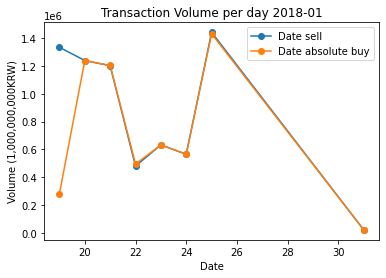

In [23]:
# Date - transaction 금액 그래프 그리기
dayTransVolGraph = day_df_date_final[['Date sell', 'Date absolute buy']].plot(title='Transaction Volume per day 2018-01', marker='o')
dayTransVolGraph.set_xlabel('Date')
dayTransVolGraph.set_ylabel('Volume (1,000,000,000KRW)')
plt.savefig('/Users/hamin/ITE3035_Python/Data_Science/graph/bithumb-2018-01-Trans_Vol_per_day.png', dpi=300)

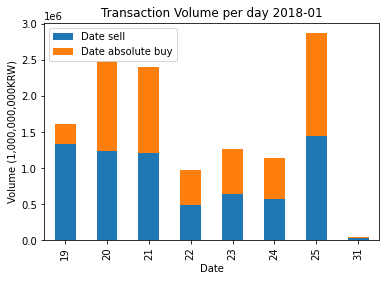

In [24]:
dayTransGraph = day_df_date_final[['Date sell', 'Date absolute buy']].plot.bar(title='Transaction Volume per day 2018-01', stacked=True)
dayTransGraph.set_xlabel('Date')
dayTransGraph.set_ylabel('Volume (1,000,000,000KRW)')
plt.savefig('/Users/hamin/ITE3035_Python/Data_Science/graph/bithumb-2018-01-Trans_Vol_per_day(stacked).png', dpi=300)

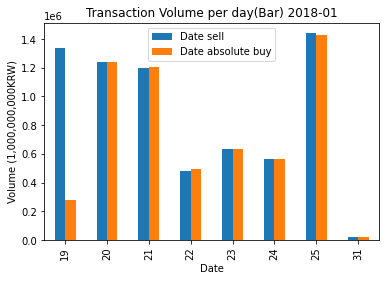

In [25]:
dayTransBarGraph = day_df_date_final[['Date sell', 'Date absolute buy']].plot.bar(title='Transaction Volume per day(Bar) 2018-01')
dayTransBarGraph.set_xlabel('Date')
dayTransBarGraph.set_ylabel('Volume (1,000,000,000KRW)')
plt.savefig('/Users/hamin/ITE3035_Python/Data_Science/graph/bithumb-2018-01-Trans_Vol_per_day(bar).png', dpi=300)